# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [171]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [172]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [173]:
# TODO: Select three indices of your choice you wish to sample from the dataset
full_list = range(len(data))
#Set sample 

try:
    if indices != np.nan:
        print "indices already initiated in previous ran, indices", indices
except:
    indices = np.random.choice(full_list,3,replace=False)
    print "indices have not been initiated in previous ran, initiate indices as", indices
    
#In case orther rest the samples: 
indices = [290, 250, 92]
    
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

indices already initiated in previous ran, indices [290, 250, 92]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2708,2160,2642,502,965,1522
1,3191,1993,1799,1730,234,710
2,9198,27472,32034,3232,18906,5130


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

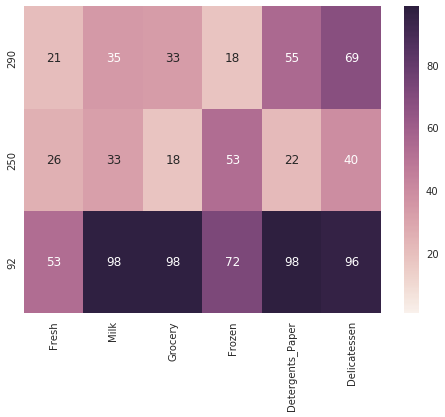

In [189]:
#heatmap of data
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

**Answer:**

1. the fisrt customer: Fresh/Milk/Grocery and Delicatessen have no big difference each of them occupied average 20% of total cost. Fresh is bottom of 25% of population. Milk/Grocery/Frozen is little bit higher than bottom 25% group,  And much less Frozen food consumed compare to Fresh/Milk/Grocery and Delicatessen, less than 10%. This one is more like a resturant who serve non-fast food. 
2. the second customer: Fresh is a bit less double of Milk/Grocery/Frozen, and is around bottom 25% group of population. Milk and Frozen is above 25% of polulation, Frozen even achieve 50% population. This is like a resturant serve regular food.
3. the last one: Milk/Grocery/Detergent_paper/Delicatessen all reach the top 25% population, on the other hand, Fresh/Frozen is around 50% of whole population. I think this is a retailer market which sell grocery and other daily stuff. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [174]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
target   = pd.to_numeric(data['Grocery']).astype(float)
new_data = data.copy()
new_data.drop(['Grocery'], axis=1, inplace=True)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
predict = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
score = r2_score
print "R^2 Score is :",score(y_test,predict)
print "MSE is :",mean_squared_error(y_test,predict)

R^2 Score is : 0.684326712988
MSE is : 14618604.7


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I choose Grocery to predict. (For intuition standpoint: Grocery will highly related to Delicatessen/Frozen/Grocery)
The reported prediction R^2 score is 0.678 

I dont think this feature is necessay for identifying customer's spending habit. The dataset have high collinearity. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

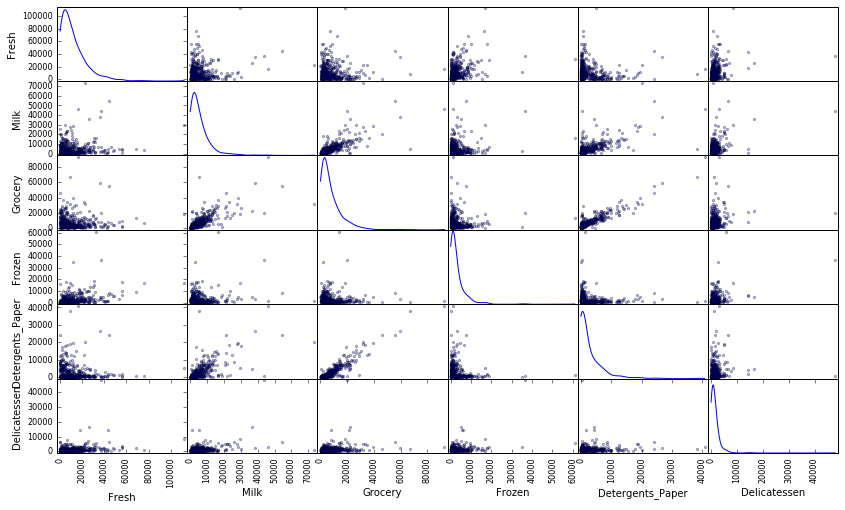

In [175]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Grocery and Detergent Paper have high correlation. 
It confirmed my suspicions. 

Data distrbuted skewed to right. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

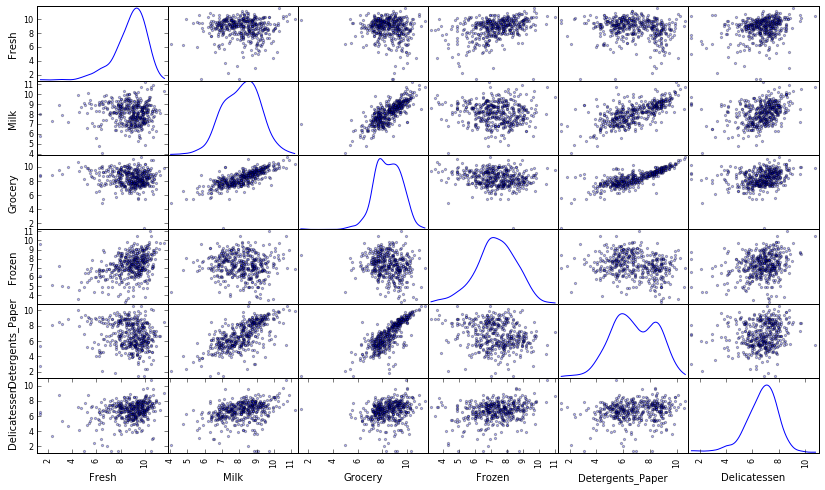

In [176]:
from sklearn.preprocessing import FunctionTransformer
# TODO: Scale the data using the natural logarithm
log_data = pd.DataFrame(FunctionTransformer(np.log1p).fit_transform(data),columns = data.columns)

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(FunctionTransformer(np.log1p).fit_transform(samples),columns = samples.columns)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [177]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.904335,7.678326,7.879670,6.220590,6.873164,7.328437
1,8.068403,7.597898,7.495542,7.456455,5.459586,6.566672
2,9.126850,10.220959,10.374584,8.081166,9.847288,8.543056


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [178]:
# For each feature find the data points with extreme high or low values
outliers = []
dupes = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    for i in list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index):
        if i not in outliers:
            outliers.append(i)
        else:
            if i not in dupes:
                dupes.append(i)
# OPTIONAL: Select the indices for data points you wish to remove

print 'Outlier Index:',outliers
print dupes

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


Outlier Index: [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 38, 57, 145, 175, 264, 325, 420, 429, 439, 161, 109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343]
[154, 65, 75, 66, 128]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Data index: 65, 75, 66, 128, 154 all ourtliers for more than one feature. 
Yes or no. I generally do two set analysis: one with outliers and another one without outliers. 
(If it is obvious that the outlier is due to incorrectly entered or measured data, drop the outlier. In this case we can not determine it is error or not)

Below are normal probability plot. 

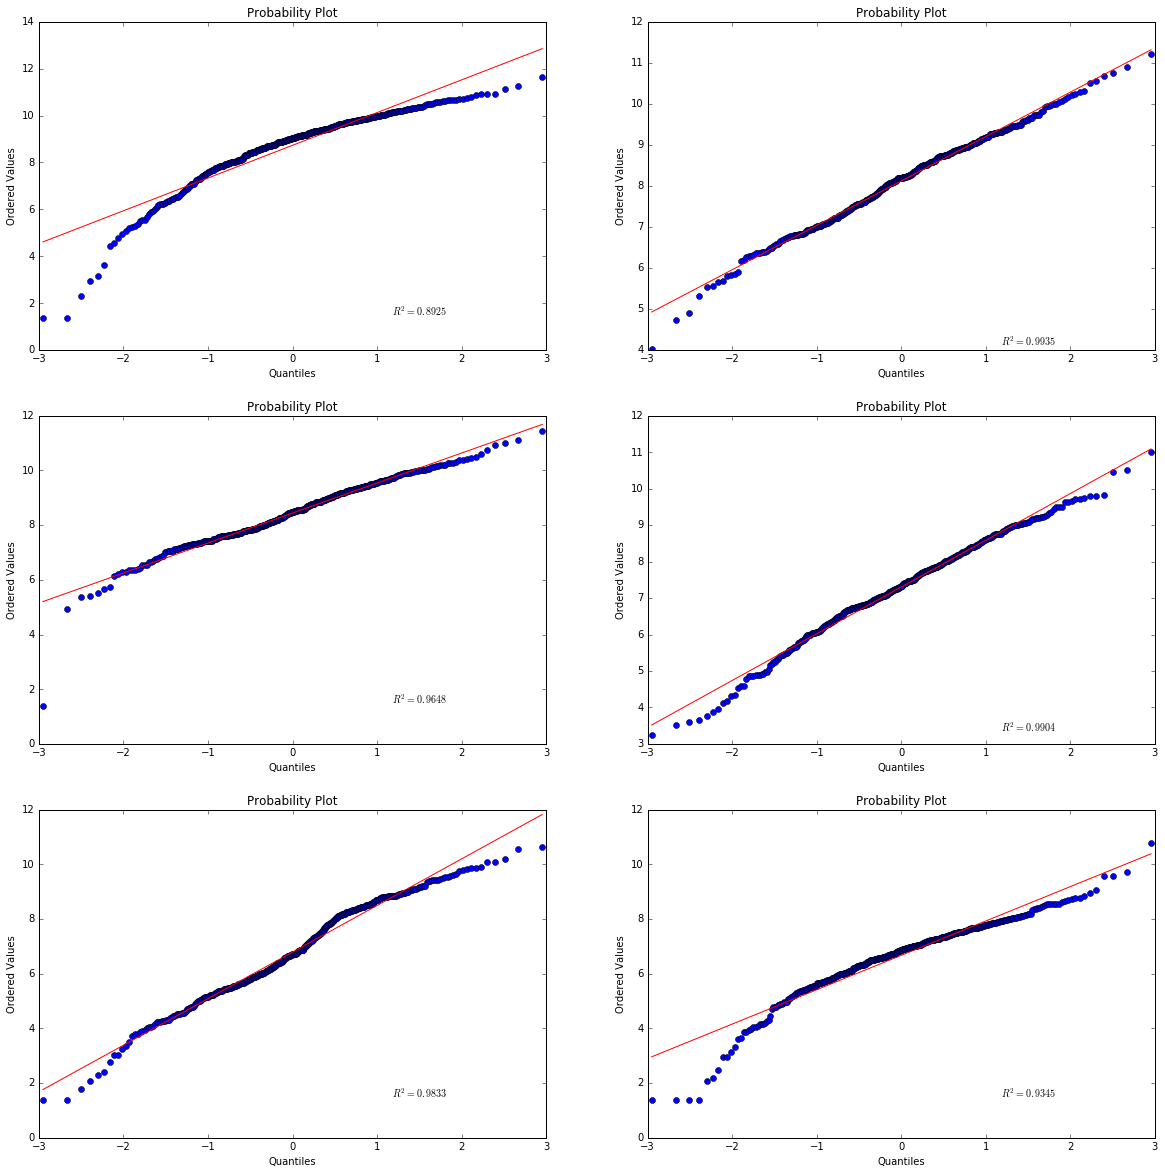

In [179]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
ax1  = plt.subplot(321)
res1 = stats.probplot(log_data.Fresh, plot=plt)
ax2  = plt.subplot(322)
res2 = stats.probplot(log_data.Milk, plot=plt)
ax3  = plt.subplot(323)
res3 = stats.probplot(log_data.Grocery, plot=plt)
ax4  = plt.subplot(324)
res4 = stats.probplot(log_data.Frozen, plot=plt)
ax5  = plt.subplot(325)
res5 = stats.probplot(log_data.Detergents_Paper, plot=plt)
ax6  = plt.subplot(326)
res6 = stats.probplot(log_data.Delicatessen, plot=plt)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

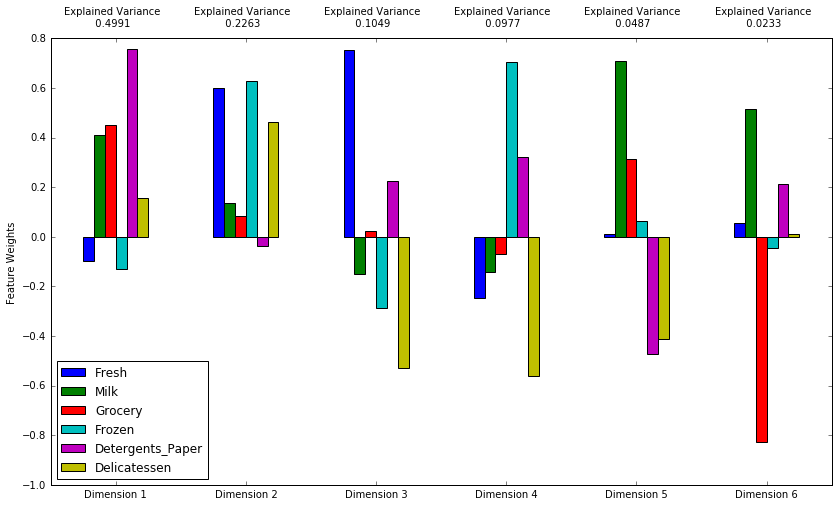

In [180]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

0.7254 variance in total by the first and second principal component. 

0.928 variance in total by the first four principal components. 

Dimension 1: A high positive weight assign to Detergent_paper, so do grocery and milk is a indicator by consumer spend on retail market. 

Dimension 2: A high positive weight assign to Fresh/Frozen/Delicateseen, represents characteristics of how resturant consume goods. 

Dimension 3: A high positive weight assign to Fresh, and high negative on Frozen/Delicateseen, meaningful positive detergents_paper represents characteristics of a resturant sell fresh food. 

Dimension 4: A high positive weight assign to Frozen, and high negative on Delicateseen, meaningful positive detergents_paper and meaningful negative weight on Fresh represents some retailor with mainly Frozen food. 



In [181]:
from sklearn.preprocessing import scale
full_data_scaled = scale(good_data)
print "finished normalization"

from sklearn.decomposition import PCA
pca_standard = PCA(n_components = 6).fit(full_data_scaled)
def pca_summary(pca_standard, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca_standard.explained_variance_ratio_)+1)]
    a = list(np.std(pca_standard.transform(standardised_data), axis=0))
    b = list(pca_standard.explained_variance_ratio_)
    c = [np.sum(pca_standard.explained_variance_ratio_[:i]) for i in range(1, len(pca_standard.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

summary = pca_summary(pca_standard, full_data_scaled)

print 'Kaiser Methods Finished'

finished normalization
Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.637574,0.446942,0.446942
PC2,1.237412,0.255198,0.702140
PC3,0.837280,0.116840,0.818979
PC4,0.792124,0.104577,0.923556
PC5,0.538857,0.048394,0.971951
PC6,0.410239,0.028049,1.000000


Kaiser Methods Finished


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [182]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.0251,-1.2486,-0.6294,-0.7697,-0.8287,0.2416
1,-1.5989,-0.7148,-0.7769,0.0715,0.0597,0.1628
2,4.2381,1.6715,-0.5390,-0.0094,-0.0164,0.1049


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [183]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [184]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
reduced_samples = pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])

,Dimension 1,Dimension 2
0,-0.0251,-1.2486
1,-1.5989,-0.7148
2,4.2381,1.6715


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is a special case when Gaussian Mixture Model. 
Advantage of K-means is easy to implement. This algorithm will going to give straight flag in final output. K-means define hard clusters. 
If you think there is some hidden parameter in model, Guassian mixture model can handle data better, GMM producing non-convex clusters, which can be controlled with the variance of the distribution. k-means cannot find non-convex clusters. GMM give soft cluster. 

I will choose GMM instead of K-means. Mixture models would let you determine subpopulations, without associating each sample with a cluster. K-means generally use as exploratory data analysis tool and initialize k for EM algorithm and if we use it independently, performance of GMM is better than that of K-means. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [185]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
clusterer = GMM(n_components = 2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.fit_predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_samples
silhouette_mean = np.mean(silhouette_samples(reduced_data,preds))

print test

silhouette_pd = pd.DataFrame(columns=[['clusters','silhouette_mean']])
for i in range(2,10):
    clusterer_search = GMM(n_components = i)
    clusterer_search.fit(reduced_data)
    preds_search = clusterer_search.fit_predict(reduced_data)
    silhouette_search = np.mean(silhouette_samples(reduced_data,preds_search))
    silhouette_pd = silhouette_pd.append(pd.DataFrame([[i,silhouette_search]],columns= ['clusters','silhouette_mean']))

display(silhouette_pd)

0.443798970307


,clusters,silhouette_mean
0,2.0,0.443799
0,3.0,0.357153
0,4.0,0.292382
0,5.0,0.267462
0,6.0,0.310502
0,7.0,0.301185
0,8.0,0.312233
0,9.0,0.308637


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Based on silhouette mean, #clusters choose 2 is best. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

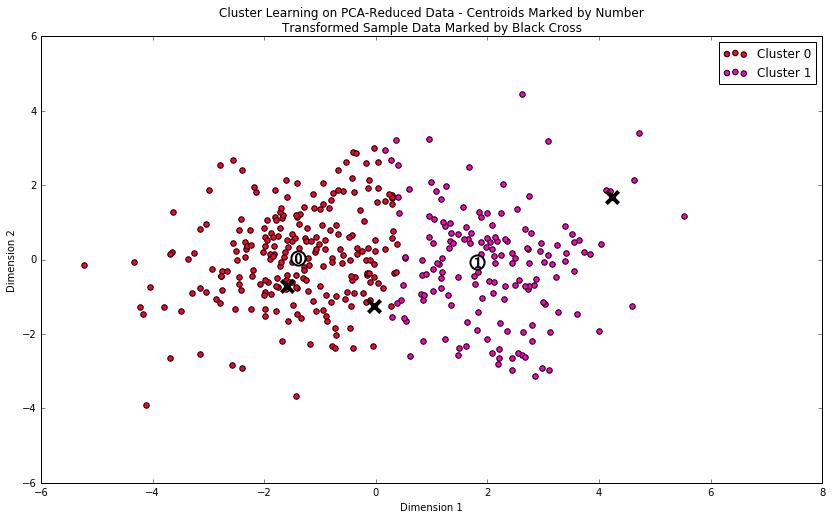

In [186]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [187]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

print log_centers
print true_centers

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

[[ 9.10201068  7.55872034  7.79718401  7.64229871  5.73915716  6.60915785]
 [ 8.71272022  8.86109232  9.23556348  7.15199588  8.17312437  7.05800514]]
[[  8973.31701158   1917.3903354    2433.73894419   2084.53004699
     310.80234388    741.8579964 ]
 [  6079.75831156   7052.18178848  10255.43897413   1276.65145838
    3544.40068512   1162.12458087]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8973.0,1917.0,2434.0,2085.0,311.0,742.0
Segment 1,6080.0,7052.0,10255.0,1277.0,3544.0,1162.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [210]:
#heatmap of data
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
for column in data.columns:
    print "Cluster center 0", column, percentiles[data[column] >= true_centers[column].iloc[0]].sort_values(by=column).iloc[0][column]
for column in data.columns:
    print "Cluster center 1", column, percentiles[data[column] >= true_centers[column].iloc[1]].sort_values(by=column).iloc[0][column]

Cluster center 0 Fresh 52.5
Cluster center 0 Milk 31.1
Cluster center 0 Grocery 29.5
Cluster center 0 Frozen 58.6
Cluster center 0 Detergents_Paper 29.4
Cluster center 0 Delicatessen 42.0
Cluster center 1 Fresh 40.0
Cluster center 1 Milk 74.1
Cluster center 1 Grocery 74.0
Cluster center 1 Frozen 44.4
Cluster center 1 Detergents_Paper 73.0
Cluster center 1 Delicatessen 59.2


**Answer:**
Based on percentile data above:

Segment 0 Fresh/Frozen/Delicatesen is sitting around 50% of total population. But Grocery and Detergents_papaer are smaller (a little bit above 25%). This is more like a resturnat or cafe who sell food. 

Segment 1 On the other hand in this segments, Fresh/Frozen sitting around 40% of total population.  Delicatessen is around 60% of total population. Compare to food section, Grocery and Detergents_paper is all around 75% of overall pupulation. It is more like a retailor store. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [211]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# TODO: Inverse transform the centers
sample_reversed = pca.inverse_transform(reduced_samples)

# TODO: Exponentiate the centers
true_samples = np.exp(sample_reversed)

# Display the true centers
segments1 = ['Sample {}'.format(i) for i in range(0,len(true_samples))]
true_samples = pd.DataFrame(np.round(true_samples), columns = data.keys())
true_samples.index = segments1
display(true_samples)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Sample 0,3586.0,2807.0,4027.0,771.0,915.0,504.0
Sample 1,5769.0,1580.0,2069.0,1320.0,272.0,503.0
Sample 2,13685.0,24256.0,35546.0,2803.0,20786.0,3811.0


In [222]:
#mathematic calculation
distances1 = np.array((samples-true_centers.iloc[0])**2)
distances1 = distances1.sum(axis=-1)
distances1 = np.sqrt(distances1)
print "Distance from sample to centers 0", distances1

#mathematic calculation
distances2 = np.array((samples-true_centers.iloc[1])**2)
distances2 = distances2.sum(axis=-1)
distances2 = np.sqrt(distances2)
print "Distance from sample to centers 1",distances2

Distance from sample to centers 0 [  6549.39256725   5828.67935299  43538.63603743]
Distance from sample to centers 1 [ 10032.01290868  10807.83748027  34008.54683752]


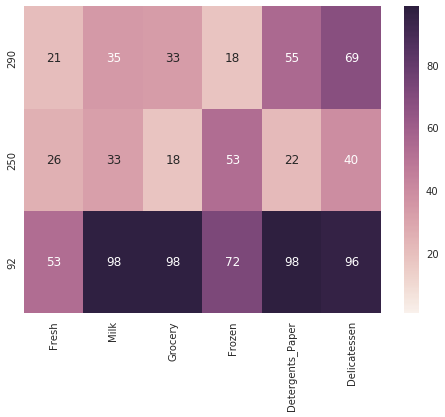

In [223]:
#heatmap of data
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

**Answer:**
Based on Euclidean distance caculated beween Centers and samples/intuitions, and also the heatmap of sample above compare to centers. 

Sample 1 has similar amount of milk/Grocery as cluster center 0, but Detergents_paper and Delicatessen is almost similar to Cluster center 1. It is little bit hard to determine if this one belong to cluster 0  or 1. But Based on Euclidean distance I will think this Belong to Cluster 0. 

Sample 2 has similar amount of milk/Detergents_paper/Delicatessen as cluster center 0, and even less Grocery compare to cluster center 0. This belong to Cluster 0. 

Sample 3 has similar amount of milk/Grocery/Detergents_paper as cluster center 1. This belong to Cluster 0. I think this is a retailor store belong to Cluster 1.  

The prediction is same as my expectations. And it also match my Answer in Question 1. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
For each cluster, Choose a small group of consumer as test group(Group A), and same amount of control group(Group B). 
Run a A/B test to see if they change delivery service time will make any difference. 

Hypothesis: Mean Cost of Group A each week = Mean Cost of Group B each week 

After test have been ran, if Hypothesis have been reject:

If Mean Cost of Group A >  Mean Cost of Group B. Means impact is positive. otherwise, impact is negative. 

The %change = (Mean Cost of Group A-Mean Cost of Group B)/(Mean Cost of Group B) shows as amount of impact if change was made. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
We already have the classifier (GMM I choosed in previous question), we just need to use new estimate product catgory to do a prediction, the we can have the predicted customer segment data. 

Based on A/B Test Result in Question 10. we can easily assign the distribution service based on customer segment. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

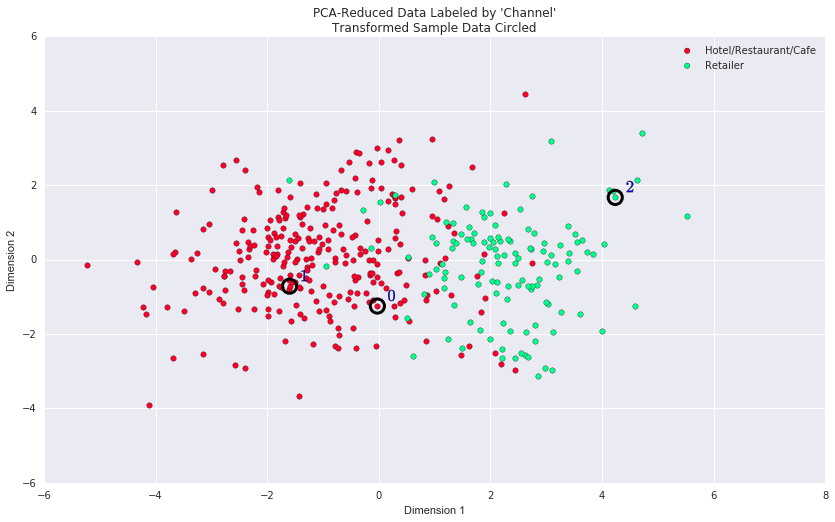

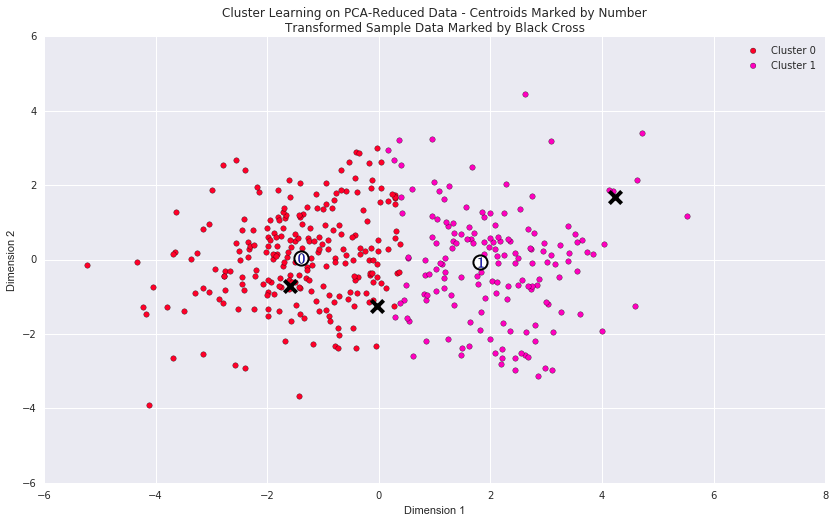

In [224]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
I will say the GMM's performance is actually not bad from visualization standpoint. 

Cause GMM is more provider what is probability belong to one segment, the middle part actually can be either resturant or retailer. It is not a hard classifier. 

I would think these classifications as consistent with my previus definition. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.